In [4]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder


##Reading data


In [5]:
dt1 = pd.read_json('/content/echonest-metrics.json')
dt2 = pd.read_csv('/content/fma-rock-vs-hiphop.csv')
data = pd.merge(dt1,dt2[['track_id','genre_top']])


In [6]:
data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [7]:
data.set_index('track_id',inplace=True)

##Checking data types and null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 2 to 124722
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      4802 non-null   float64
 1   danceability      4802 non-null   float64
 2   energy            4802 non-null   float64
 3   instrumentalness  4802 non-null   float64
 4   liveness          4802 non-null   float64
 5   speechiness       4802 non-null   float64
 6   tempo             4802 non-null   float64
 7   valence           4802 non-null   float64
 8   genre_top         4802 non-null   object 
dtypes: float64(8), object(1)
memory usage: 375.2+ KB


#Checking the correlation between features to avoid feature redaundancy

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

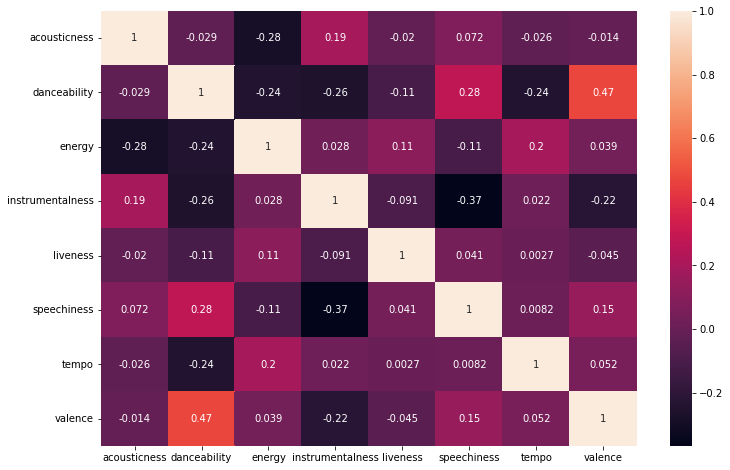

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [11]:
columns=data.columns[:-1]

#Checking outliers

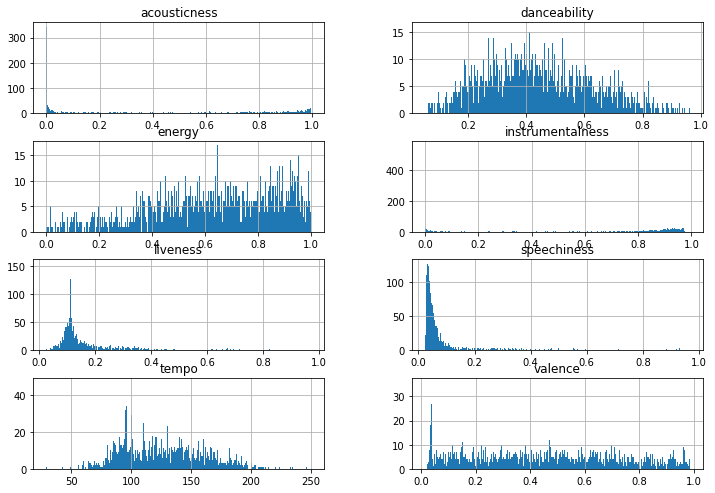

In [12]:
data[columns].hist(stacked=False, bins=1000, figsize=(12,30), layout=(14,2));

In [13]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


acousticness       -0.046989
danceability        0.300826
energy             -0.426704
instrumentalness   -0.685498
liveness            2.307558
speechiness         3.233927
tempo               0.328369
valence             0.143715
dtype: float64

#Here we replaced the outliers values with 1st and 3rd qurtaile

In [14]:
print(data["speechiness"].quantile(0.10))
print(data["speechiness"].quantile(0.90))

0.031225153060000004
0.2648208786200006


In [15]:
data["speechiness"]=np.where(data["speechiness"] <0.03122515306
, 0.03122515306,data["speechiness"])
data["speechiness"]=np.where(data["speechiness"] >0.26482087862, 0.26482087862,data["speechiness"])
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


acousticness       -0.046989
danceability        0.300826
energy             -0.426704
instrumentalness   -0.685498
liveness            2.307558
speechiness         1.672199
tempo               0.328369
valence             0.143715
dtype: float64

#Scalling data

In [16]:
from sklearn.preprocessing import MinMaxScaler
#scaling columns that has large values
data_copy=data.copy()
scaler = MinMaxScaler()
data[["tempo"]] = scaler.fit_transform(data[["tempo"]])
data.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,0.619231,0.576661,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.264821,0.442892,0.269240,Hip-Hop
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,0.322072,0.621661,Hip-Hop
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.264821,0.385566,0.894072,Hip-Hop
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,0.276730,0.034018,Rock


Replace object to numerical ( 1 for Hip-Hop , 0 for Rock )

In [17]:
data.loc[(data['genre_top'] == 'Hip-Hop'), ['genre_top']] = 1
data.loc[(data['genre_top'] == 'Rock'), ['genre_top']] = 0
data.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,0.619231,0.576661,1
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.264821,0.442892,0.269240,1
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,0.322072,0.621661,1
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.264821,0.385566,0.894072,1
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,0.276730,0.034018,0


In [18]:
X = data.iloc[:,:-1]
y = data['genre_top']

In [19]:
from sklearn.decomposition import PCA
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.543886,0.335983,0.023452,-0.060627,0.064877,-0.069941,0.212359,-0.006885
1,0.519800,0.157512,0.311343,-0.164567,-0.123960,-0.183476,0.115354,0.114934
2,0.808755,0.091250,-0.049823,0.061228,-0.205128,0.136066,0.102136,-0.032300
3,0.552818,0.450399,-0.186494,-0.022048,0.051998,-0.059526,-0.137145,0.151784
4,-0.652502,-0.091760,0.276888,-0.364221,-0.291848,-0.150975,-0.053602,-0.004200


In [20]:
exp_variance =pca.explained_variance_ratio_
num_comp = pca.n_components_

Text(0.5, 0, 'Principal Components')

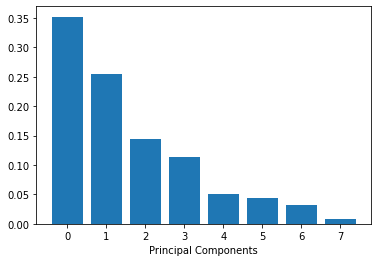

In [21]:
fig, ax =plt.subplots()
ax.bar(range(num_comp),exp_variance)
ax.set_xlabel("Principal Components")

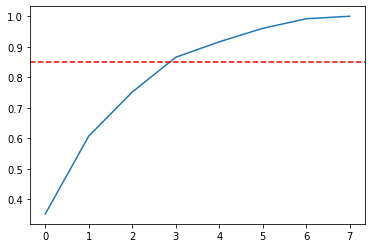

In [22]:
cum_exp_variance =np.cumsum(exp_variance)
fig , ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85,linestyle='--',color='red')

In [23]:
pca=PCA(7,random_state=40)
pca.fit(X)
pca_projection = pca.transform(X)

In [44]:
pca_projection.shape

(4802, 7)

In [24]:
y=y.astype('int')

In [25]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X_pca,y,test_size=0.20,random_state=10)

In [26]:
X_train[:5]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
3381,0.021412,-0.689099,0.155235,-0.052705,-0.107696,0.376833,-0.123864,0.035435
4362,0.745699,0.278886,-0.086439,0.494351,-0.004103,-0.000619,-0.222719,-0.010636
907,-0.512157,0.263416,0.260934,0.363829,-0.184181,-0.063983,0.005169,-0.052626
187,0.317217,-0.437712,-0.121057,-0.072681,-0.022846,-0.104613,-0.086786,-0.024850
296,-0.366395,-0.336585,0.305801,-0.457411,0.009856,0.338626,0.293687,-0.018805


#Logistic Regression model 89%

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()    
model1.fit(X_train, y_train)
# Prediction on test set
Y_pred = model1.predict( X_test )    
print(accuracy_score(Y_pred,y_test))

0.8938605619146722


# As we can see here the f1 score of Hip-hop is low the reason is unbalncing of data

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       821
           1       0.60      0.81      0.69       140

    accuracy                           0.89       961
   macro avg       0.78      0.86      0.81       961
weighted avg       0.91      0.89      0.90       961



Descsion tree classifier 87%

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(random_state=24) 
tree.fit(X_train,y_train)
yt_pred=tree.predict(X_test)
print("Accuracy :{}".format(accuracy_score(yt_pred,y_test)))
print(classification_report(yt_pred,y_test))

Accuracy :0.8761706555671176
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       768
           1       0.70      0.68      0.69       193

    accuracy                           0.88       961
   macro avg       0.81      0.80      0.81       961
weighted avg       0.88      0.88      0.88       961



###K-fold validation 

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X_train, y_train,
                              cv=10,
                              scoring='accuracy')

print("Accuracy scores:\n", scores)

Accuracy scores:
 [0.86233766 0.87760417 0.8515625  0.83333333 0.8828125  0.86458333
 0.89583333 0.875      0.875      0.8984375 ]


In [31]:
print("Average accuracy scores:\n" ,np.average(scores) )

Average accuracy scores:
 0.871650432900433


##Balancing data With SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10, sampling_strategy=1.0)
X_train_res ,y_train_res=sm.fit_resample(X_train,y_train)

In [33]:
X_train_res.shape

(6238, 8)

In [34]:
y_train_res.value_counts()

0    3119
1    3119
Name: genre_top, dtype: int64

Logistic Regression after resampling

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()    
model1.fit(X_train_res, y_train_res)
# Prediction on test set
Y_pred = model1.predict( X_test )    
print("Accuracy score\n:",accuracy_score(Y_pred,y_test))
print(classification_report(Y_pred,y_test))

Accuracy score
: 0.8855359001040582
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       725
           1       0.84      0.67      0.74       236

    accuracy                           0.89       961
   macro avg       0.87      0.81      0.83       961
weighted avg       0.88      0.89      0.88       961



Descion Tree After resampling

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(random_state=24) 
tree.fit(X_train_res,y_train_res)
yt_pred=tree.predict(X_test)
print("Accuracy :\n{}".format(accuracy_score(yt_pred,y_test)))
print(classification_report(yt_pred,y_test))

Accuracy :
0.858480749219563
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       747
           1       0.71      0.62      0.66       214

    accuracy                           0.86       961
   macro avg       0.80      0.77      0.79       961
weighted avg       0.85      0.86      0.86       961



K-Fold After resampling

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X_train_res, y_train_res,
                              cv=10,
                              scoring='accuracy')

print("Accuracy scores:\n", np.round(scores*100,2))

Accuracy scores:
 [90.06 89.9  89.74 91.19 91.03 90.71 92.63 89.9  93.1  91.65]


In [43]:

print("K-fold Average score:\n ",np.round(np.average(scores)*100),"%")

K-fold Average score:
  91.0 %
